# Import libraries


In [641]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split




# Load Data


In [642]:
ads_data = pd.read_csv("/content/drive/My Drive/business algorithms exam/ads-data.csv")
additional_parameters = pd.read_csv("/content/drive/My Drive/business algorithms exam/additional-parameters.csv")
ads_views = pd.read_csv("/content/drive/My Drive/business algorithms exam/ads-views.csv")

# Data cleaning and preprocessing
Lets review each of the given DataFrames and merge them to the final Dataframe that will contain clean and preprocessed data.


**Ads_Data** contains all the main data about the ad. For now we will leave it uncleaned and will come back to the columns it contains after mergre.

In [643]:
ads_data.head()

,id,city_id,country_id,title,title_len,description,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image,image_size,image_count
0,62352700,100012,12,Продаю б/у холодильник(нерабочий). Цена догово...,59,Продаю б/у холодильник(нерабочий). Цена догово...,59,73,NaN,NaN,True,2019-09-15 13:46:22+00,2019-09-25 13:31:32+00,/00/a9/532e47a62e54288352c3e94017ba.jpeg,583x1200,2.0
1,51279082,100166,12,Продаю Холодильник Indesit DF 4160 W,36,Продаю Холодильник Indesit DF 4160 W\n\nПродае...,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,/fe/29/76f202be09a91ccaf1c2d6c45afe.jpeg,774x1032,1.0
2,58488402,100450,12,NaN,0,NaN,0,19,NaN,NaN,True,2019-05-29 03:46:09+00,2019-07-15 05:33:48+00,/38/32/21305ba25e6c55c79a9c9947111d.jpeg,873x1552,1.0
3,62741678,100560,12,торг уместен,13,торг уместен,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,/7b/df/01014cd191ec3c0884706eeaea8e.jpeg,809x1080,1.0
4,64074838,100903,12,NaN,0,NaN,0,76,5000.0,KGS,False,2019-10-28 03:37:21+00,NaN,/03/74/09ff67ec251e2ec9be7e3bb6f311.jpeg,584x1040,3.0


**Additional_parameters** contains the unstructered additional parameters of the ads


In [644]:
additional_parameters.head()

,ad_id,param_id,value
0,62352700,29,Used
1,62352700,105,white
2,62352700,221,Stinol
3,62352700,222,Double Chamber
4,62352700,223,Bottom


Lets view what parameters are there:

In [645]:
additional_parameters.param_id.unique()

array([ 29, 105, 221, 222, 223, 425, 358])

As we can in see, in total - there are 7 parameters. Lets view what data they contain:

In [646]:
additional_parameters.value.unique()

array(['Used', 'white', 'Stinol', 'Double Chamber', 'Bottom', 'LG',
       'Single Chamber', 'Top', 'Bosch', 'Vestfrost', 'Daewoo',
       'Three Chambered', 'Saturn', 'Indesit', 'Hotpoint Ariston',
       'Minsk', 'Biryusa', 'blue', 'Refrigerator Showcase',
       'Without Freezer', 'Samsung', 'New', 'Atlant', 'Pozis', 'grey',
       'Beko', 'Saratov', 'Orsk', 'Swizer', 'Nord', 'Siemens',
       'Free delivery', 'Silver Iphone', 'Hitachi', 'Paid delivery',
       'black', 'Needs repair', 'pink', 'Avest', 'brown', 'gold', 'Beige',
       'Milky-white', 'Midea', 'Left', 'Customer pickup', 'Delivered-1',
       'Dnepr', 'red', 'Side-By-Side', 'For parts', 'yellow', 'Built-In',
       'Hisense', 'Shivaki', 'Caso', 'green', 'Snaige', 'Haier', 'Wine',
       'Profycool', 'Pamir', 'orange', 'purple', 'Blue-1', 'AEG',
       'Electrolux', 'Ardo', 'Zil', 'Vestel', 'Cinar', 'Freggia',
       'Hauser', 'Rokos', 'Sky Berg', 'Sharp', 'Laretti', 'Star',
       'Arctic', 'Delfa', 'Toshiba', 'Liebher

So we have the data about the Condition, Color, Manufacturer and etc. 
Lets transform our data: 

In [647]:
additional_parameters = additional_parameters.drop_duplicates(['ad_id','param_id'], keep='last').pivot(index='ad_id', columns='param_id', values='value')

In [648]:
additional_parameters = pd.DataFrame(additional_parameters.to_records())

In [649]:
additional_parameters

,ad_id,29,105,221,222,223,358,425
0,36957027,New,NaN,NaN,NaN,NaN,NaN,NaN
1,37118694,Used,Silver Iphone,NaN,Double Chamber,Bottom,NaN,NaN
2,37175537,Used,white,NaN,NaN,Top,NaN,NaN
3,37968236,Used,NaN,NaN,NaN,NaN,NaN,NaN
4,38070336,Used,NaN,Beko,NaN,Top,NaN,NaN
...,...,...,...,...,...,...,...,...
50354,73542927,Needs repair,white,Samsung,Double Chamber,Top,NaN,NaN
50355,73545060,Used,white,LG,Double Chamber,Top,NaN,Paid delivery
50356,73545466,NaN,NaN,Sharp,NaN,Top,NaN,NaN
50357,73545703,Used,white,Nord,Double Chamber,Top,NaN,Paid delivery


Here we can seee a unique values of non-classified columns

In [650]:
print(additional_parameters['222'].unique())
print(additional_parameters['223'].unique())
print(additional_parameters['358'].unique())

[nan 'Double Chamber' 'Single Chamber' 'Three Chambered' 'Wine'
 'Refrigerator Showcase' 'Side-By-Side' 'Built-In']
[nan 'Bottom' 'Top' 'Without Freezer' 'Left']
[nan 'Zabrat' 'Sabailskij' 'Lokbatan' 'Fatmai' 'Nardaran' 'Digyah'
 'Mushvugabad' 'Tyurkan' 'Novhany']


Now we know the name of each parameter. Let's change the column names:

In [651]:
additional_parameters.columns = ['ad_id', 'Condition', 'Color', 'Manufacturer', 'Type', 'Freezer', 'Location', 'Delivery']

And finally we have:

In [652]:
additional_parameters.head()

,ad_id,Condition,Color,Manufacturer,Type,Freezer,Location,Delivery
0,36957027,New,NaN,NaN,NaN,NaN,NaN,NaN
1,37118694,Used,Silver Iphone,NaN,Double Chamber,Bottom,NaN,NaN
2,37175537,Used,white,NaN,NaN,Top,NaN,NaN
3,37968236,Used,NaN,NaN,NaN,NaN,NaN,NaN
4,38070336,Used,NaN,Beko,NaN,Top,NaN,NaN


**Ads_views** contains the views data of each add:

In [653]:
ads_views.head()

,Unnamed: 0,ad_id,views
0,0,73400326,186.0
1,1,66584583,96.0
2,2,62390289,50.0
3,3,71303195,168.0
4,4,73400349,202.0


Now we can merge all this 3 DataFrames into the final DataFrame and make manipulations with it.

In [654]:
df = ads_data.join(additional_parameters.set_index('ad_id'), on='id').join(ads_views.set_index('ad_id'), on='id')
df

,id,city_id,country_id,title,title_len,description,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image,image_size,image_count,Condition,Color,Manufacturer,Type,Freezer,Location,Delivery,Unnamed: 0,views
0,62352700,100012,12,Продаю б/у холодильник(нерабочий). Цена догово...,59,Продаю б/у холодильник(нерабочий). Цена догово...,59,73,NaN,NaN,True,2019-09-15 13:46:22+00,2019-09-25 13:31:32+00,/00/a9/532e47a62e54288352c3e94017ba.jpeg,583x1200,2.0,Used,white,Stinol,Double Chamber,Bottom,NaN,NaN,76238.0,324.0
1,51279082,100166,12,Продаю Холодильник Indesit DF 4160 W,36,Продаю Холодильник Indesit DF 4160 W\n\nПродае...,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,/fe/29/76f202be09a91ccaf1c2d6c45afe.jpeg,774x1032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65967.0,169.0
2,58488402,100450,12,NaN,0,NaN,0,19,NaN,NaN,True,2019-05-29 03:46:09+00,2019-07-15 05:33:48+00,/38/32/21305ba25e6c55c79a9c9947111d.jpeg,873x1552,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45373.0,248.0
3,62741678,100560,12,торг уместен,13,торг уместен,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,/7b/df/01014cd191ec3c0884706eeaea8e.jpeg,809x1080,1.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,54464.0,64.0
4,64074838,100903,12,NaN,0,NaN,0,76,5000.0,KGS,False,2019-10-28 03:37:21+00,NaN,/03/74/09ff67ec251e2ec9be7e3bb6f311.jpeg,584x1040,3.0,Used,white,LG,Single Chamber,Top,NaN,NaN,17668.0,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85528,70380426,103802,13,NaN,0,NaN,0,70,250.0,AZN,False,2020-03-20 13:58:36+00,2020-03-26 22:44:13+00,/44/3c/62/4cfb1f2fb1a13a150caab5bc01.jpeg,370x658,4.0,Used,white,NaN,Refrigerator Showcase,NaN,NaN,NaN,19894.0,260.0
85529,71095200,103803,13,New Double Chamber white refrigerator Zanussi,45,Zanussi soyuducusu negd ve ya kreditle artiq b...,284,84,544.0,AZN,False,2020-04-18 12:09:06+00,NaN,/d8/3d/8f/de5b1eb12aee05580ec33b3eec.jpeg,370x370,1.0,New,white,Zanussi,Double Chamber,Top,NaN,Paid delivery,49033.0,170.0
85530,67961929,103803,13,Tecili xaladelnik satilir super veziyyetde qiy...,58,Tecili xaladelnik satilir super veziyyetde qiy...,58,55,NaN,NaN,True,2020-01-26 03:06:13+00,NaN,/6b/0b/76/98f8f459652c7603f53386f395.jpeg,370x740,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50951.0,782.0
85531,71262662,103803,13,New Double Chamber white refrigerator Electrolux,48,Electrolux soyuduculari negd ve ya kreditle el...,188,84,1000.0,AZN,False,2020-04-24 20:52:19+00,2020-04-30 08:47:41+00,/b2/d2/de/b3f23becfca4b4ed62d5a800b3.jpeg,370x493,1.0,New,white,Electrolux,Double Chamber,Top,NaN,Paid delivery,75738.0,64.0


Let's drop irrelevant columns:

In [655]:
df.columns

Index(['id', 'city_id', 'country_id', 'title', 'title_len', 'description',
       'desc_len', 'completeness', 'price', 'currency', 'price_negotiable',
       'created_time', 'deactivated_time', 'image', 'image_size',
       'image_count', 'Condition', 'Color', 'Manufacturer', 'Type', 'Freezer',
       'Location', 'Delivery', 'Unnamed: 0', 'views'],
      dtype='object')

In [656]:
df = df.drop(['id', 'Location','image_size','Manufacturer', 'Unnamed: 0'], axis=1)
df

,city_id,country_id,title,title_len,description,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image,image_count,Condition,Color,Type,Freezer,Delivery,views
0,100012,12,Продаю б/у холодильник(нерабочий). Цена догово...,59,Продаю б/у холодильник(нерабочий). Цена догово...,59,73,NaN,NaN,True,2019-09-15 13:46:22+00,2019-09-25 13:31:32+00,/00/a9/532e47a62e54288352c3e94017ba.jpeg,2.0,Used,white,Double Chamber,Bottom,NaN,324.0
1,100166,12,Продаю Холодильник Indesit DF 4160 W,36,Продаю Холодильник Indesit DF 4160 W\n\nПродае...,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,/fe/29/76f202be09a91ccaf1c2d6c45afe.jpeg,1.0,NaN,NaN,NaN,NaN,NaN,169.0
2,100450,12,NaN,0,NaN,0,19,NaN,NaN,True,2019-05-29 03:46:09+00,2019-07-15 05:33:48+00,/38/32/21305ba25e6c55c79a9c9947111d.jpeg,1.0,NaN,NaN,NaN,NaN,NaN,248.0
3,100560,12,торг уместен,13,торг уместен,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,/7b/df/01014cd191ec3c0884706eeaea8e.jpeg,1.0,Used,NaN,NaN,NaN,NaN,64.0
4,100903,12,NaN,0,NaN,0,76,5000.0,KGS,False,2019-10-28 03:37:21+00,NaN,/03/74/09ff67ec251e2ec9be7e3bb6f311.jpeg,3.0,Used,white,Single Chamber,Top,NaN,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85528,103802,13,NaN,0,NaN,0,70,250.0,AZN,False,2020-03-20 13:58:36+00,2020-03-26 22:44:13+00,/44/3c/62/4cfb1f2fb1a13a150caab5bc01.jpeg,4.0,Used,white,Refrigerator Showcase,NaN,NaN,260.0
85529,103803,13,New Double Chamber white refrigerator Zanussi,45,Zanussi soyuducusu negd ve ya kreditle artiq b...,284,84,544.0,AZN,False,2020-04-18 12:09:06+00,NaN,/d8/3d/8f/de5b1eb12aee05580ec33b3eec.jpeg,1.0,New,white,Double Chamber,Top,Paid delivery,170.0
85530,103803,13,Tecili xaladelnik satilir super veziyyetde qiy...,58,Tecili xaladelnik satilir super veziyyetde qiy...,58,55,NaN,NaN,True,2020-01-26 03:06:13+00,NaN,/6b/0b/76/98f8f459652c7603f53386f395.jpeg,3.0,NaN,NaN,NaN,NaN,NaN,782.0
85531,103803,13,New Double Chamber white refrigerator Electrolux,48,Electrolux soyuduculari negd ve ya kreditle el...,188,84,1000.0,AZN,False,2020-04-24 20:52:19+00,2020-04-30 08:47:41+00,/b2/d2/de/b3f23becfca4b4ed62d5a800b3.jpeg,1.0,New,white,Double Chamber,Top,Paid delivery,64.0


Let's try to extract some text data out of the title and description:

In [657]:
title = [i for name in ads_data[ads_data['title'].notna()].title.to_list() for i in str(name).split()]
title = [''.join(filter(str.isalnum, i)).lower() for i in title]
description = [i for name in ads_data[ads_data['description'].notna()].description.to_list() for i in str(name).split()]
description = [''.join(filter(str.isalnum, i)).lower() for i in description]
text = title + description

View the most used words in title and description:

In [658]:
from collections import Counter


new_vals = Counter(text).most_common()
new_vals = new_vals

for a, b in new_vals[:100]:
    print(a, b)

soyuducu 44521
холодильник 38328
продаю 17916
super 15089
в 14706
satilir 14528
var 13975
yaxşı 13237
 12826
isleyir 11961
bir 11236
yoxdu 10651
soyudur 10485
ela 10227
tam 10074
işləyir 9414
yoxdur 9116
satılır 8622
состоянии 8200
problemi 7997
hec 7957
ve 7858
zemanetle 7616
azn 7090
endirim 6804
əla 6146
praqa 5990
unvan 5768
catdirilma 5733
elave 5610
срочно 5450
beko 5265
tecili 5173
çürüyü 5064
бу 5039
nefitcilerde 4814
real 4750
kredit 4561
işlək 4516
mumkundur 4507
хорошем 4422
2 4394
veziyyetde 4392
zeng 4382
prablemi 4280
состояние 4268
və 4226
arxasinda 3962
restaraninin 3959
orsk 3707
не 3664
отличном 3652
indesit 3577
ucuz 3544
1 3493
рабочий 3393
veziyyetdedi 3384
работает 3359
sakit 3348
samsung 3345
soyuducular 3345
islek 3242
nord 3237
az 3237
odenisle 3153
высота 3068
edin 3067
olar 3064
qiymete 3059
vəziyyətdədir 3036
yaxındı 3034
3 3029
aliciya 3015
verilir 3006
yaxin 2994
ay 2993
çinar 2958
iki 2905
soyuducusu 2836
no 2823
soyuducularimiz 2809
lg 2790
heç 2787
işle

As all the text data is unstructered and presented in different languages, we wont use it anymore. However we will leave the length of the title and decription, as we think that this values will be useful for our predictions

In [659]:
df = df.drop(['title', 'description', 'image', 'city_id', 'country_id'], axis=1)
df.head()

,title_len,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image_count,Condition,Color,Type,Freezer,Delivery,views
0,59,59,73,NaN,NaN,True,2019-09-15 13:46:22+00,2019-09-25 13:31:32+00,2.0,Used,white,Double Chamber,Bottom,NaN,324.0
1,36,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,1.0,NaN,NaN,NaN,NaN,NaN,169.0
2,0,0,19,NaN,NaN,True,2019-05-29 03:46:09+00,2019-07-15 05:33:48+00,1.0,NaN,NaN,NaN,NaN,NaN,248.0
3,13,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,1.0,Used,NaN,NaN,NaN,NaN,64.0
4,0,0,76,5000.0,KGS,False,2019-10-28 03:37:21+00,NaN,3.0,Used,white,Single Chamber,Top,NaN,1485.0


In [660]:
df = df[df['price'].notna() & df['deactivated_time'].notna() & df['views'].notna()]
df.head()

,title_len,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image_count,Condition,Color,Type,Freezer,Delivery,views
1,36,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,1.0,NaN,NaN,NaN,NaN,NaN,169.0
3,13,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,1.0,Used,NaN,NaN,NaN,NaN,64.0
7,19,19,71,3000.0,KGS,False,2019-09-22 21:18:37+00,2019-09-23 13:45:37+00,1.0,Used,white,Double Chamber,Bottom,NaN,110.0
8,40,40,86,4000.0,KGS,False,2019-11-26 18:59:46+00,2019-12-21 10:41:57+00,3.0,Used,white,Double Chamber,Top,NaN,1122.0
9,48,48,92,10200.0,KGS,False,2019-09-21 14:24:26+00,2019-11-03 19:02:24+00,6.0,Used,white,Double Chamber,Bottom,NaN,1035.0


In [661]:
df = df[df['price'].notna() & df['deactivated_time'].notna()]
df.head()

,title_len,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image_count,Condition,Color,Type,Freezer,Delivery,views
1,36,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,1.0,NaN,NaN,NaN,NaN,NaN,169.0
3,13,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,1.0,Used,NaN,NaN,NaN,NaN,64.0
7,19,19,71,3000.0,KGS,False,2019-09-22 21:18:37+00,2019-09-23 13:45:37+00,1.0,Used,white,Double Chamber,Bottom,NaN,110.0
8,40,40,86,4000.0,KGS,False,2019-11-26 18:59:46+00,2019-12-21 10:41:57+00,3.0,Used,white,Double Chamber,Top,NaN,1122.0
9,48,48,92,10200.0,KGS,False,2019-09-21 14:24:26+00,2019-11-03 19:02:24+00,6.0,Used,white,Double Chamber,Bottom,NaN,1035.0


In [662]:
df 

,title_len,desc_len,completeness,price,currency,price_negotiable,created_time,deactivated_time,image_count,Condition,Color,Type,Freezer,Delivery,views
1,36,293,59,18000.0,KGS,False,2018-11-15 01:27:03+00,2019-01-08 15:39:00+00,1.0,NaN,NaN,NaN,NaN,NaN,169.0
3,13,13,49,10000.0,KGS,False,2019-09-25 07:49:26+00,2019-09-25 15:27:39+00,1.0,Used,NaN,NaN,NaN,NaN,64.0
7,19,19,71,3000.0,KGS,False,2019-09-22 21:18:37+00,2019-09-23 13:45:37+00,1.0,Used,white,Double Chamber,Bottom,NaN,110.0
8,40,40,86,4000.0,KGS,False,2019-11-26 18:59:46+00,2019-12-21 10:41:57+00,3.0,Used,white,Double Chamber,Top,NaN,1122.0
9,48,48,92,10200.0,KGS,False,2019-09-21 14:24:26+00,2019-11-03 19:02:24+00,6.0,Used,white,Double Chamber,Bottom,NaN,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85516,67,101,75,200.0,AZN,False,2020-01-26 08:33:41+00,2020-01-26 17:34:09+00,6.0,NaN,NaN,NaN,NaN,NaN,118.0
85517,69,156,100,160.0,AZN,False,2020-01-26 17:34:27+00,2020-01-26 20:16:40+00,5.0,Used,grey,Double Chamber,Bottom,NaN,100.0
85519,68,119,100,160.0,AZN,False,2020-01-27 08:08:50+00,2020-01-27 12:46:57+00,4.0,Used,grey,Double Chamber,Bottom,NaN,64.0
85528,0,0,70,250.0,AZN,False,2020-03-20 13:58:36+00,2020-03-26 22:44:13+00,4.0,Used,white,Refrigerator Showcase,NaN,NaN,260.0


Convert date columns to datetime type:

In [663]:
df['created_time'] =  pd.to_datetime(df['created_time'],).dt.floor('H')
df['deactivated_time'] =  pd.to_datetime(df['deactivated_time']).dt.floor('H')


Plot of the ads activating frequency:

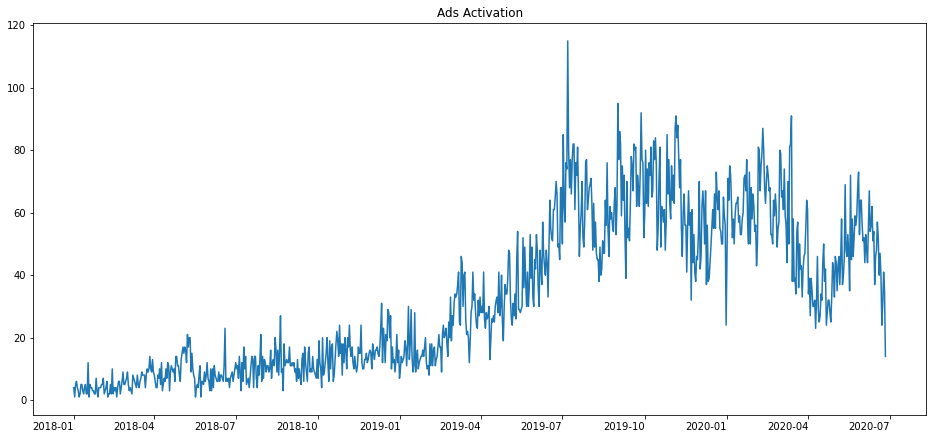

In [664]:
fig = plt.figure(figsize=(16,8))
plt.title("Ads Activation")
df.created_time.dt.floor('D').value_counts().plot(rot = 0);

And deactivating:

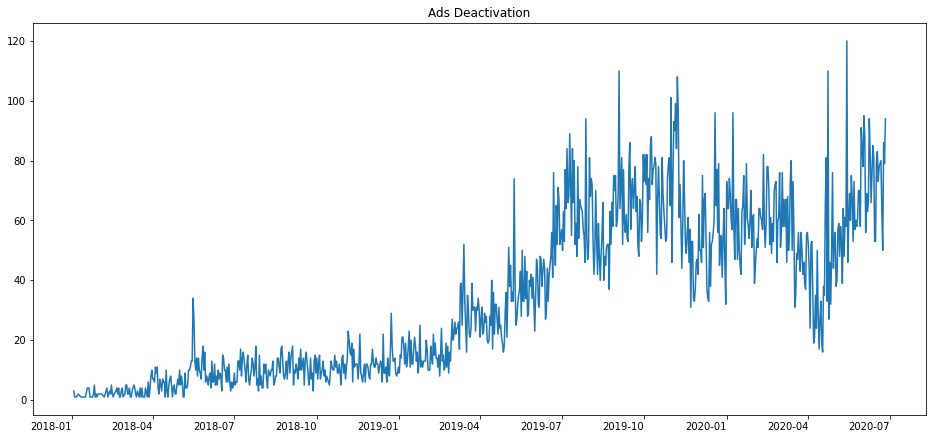

In [665]:
fig = plt.figure(figsize=(16,8))
plt.title("Ads Deactivation")
df.deactivated_time.dt.floor('D').value_counts().plot(rot = 0);

As a good measure of an add quality we will use difference between start and sell dates. We had an idea to multiply this value on number of ad views. So,measuring ads with equal active time, the one that have less views - would be better. However, we refused this idea, as usage of ad views parameter is really contradictive and brings some difficulties to this metric.

Obtaining the time when the ad was active. We will measure it in hours to catch all the possible scenarions:



In [666]:
df['active_time'] = -(df['created_time'] - df['deactivated_time']).astype('timedelta64[h]')

In [667]:
df = df.drop(['created_time', 'deactivated_time', 'views'], axis=1)

Lets convert all the prices to USD:

In [668]:
df.currency.unique()

array(['KGS', 'USD', 'AZN'], dtype=object)

In [669]:
df.loc[df['currency'] =='KGS', 'price']*=0.013
df.loc[df['currency'] =='AZN', 'price']*=0.59
df = df.drop(['currency'], axis = 1)

In [670]:
df.head()

,title_len,desc_len,completeness,price,price_negotiable,image_count,Condition,Color,Type,Freezer,Delivery,active_time
1,36,293,59,234.0,False,1.0,NaN,NaN,NaN,NaN,NaN,1310.0
3,13,13,49,130.0,False,1.0,Used,NaN,NaN,NaN,NaN,8.0
7,19,19,71,39.0,False,1.0,Used,white,Double Chamber,Bottom,NaN,16.0
8,40,40,86,52.0,False,3.0,Used,white,Double Chamber,Top,NaN,592.0
9,48,48,92,132.6,False,6.0,Used,white,Double Chamber,Bottom,NaN,1037.0


Lets obtain what are the most popular colors 

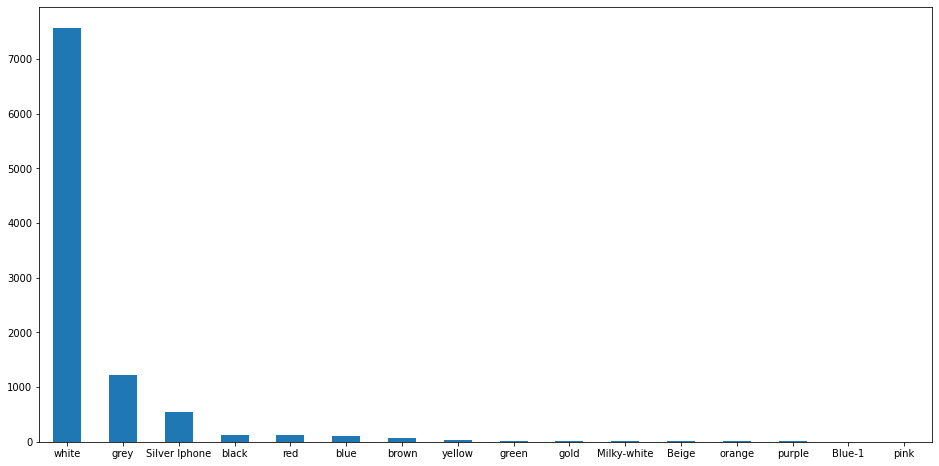

In [671]:
fig = plt.figure(figsize=(16,8))
df.Color.value_counts().plot.bar(rot = 0)

As we can see from the chart above, the most popular colors are: White, Grey and Silver ( Silver Iphone, after the imagу check we ensured that this is the color name, not a misplaced ads).
Lets assume that this 3 colors are standart and the refrigerators of other colors will be avoided by the customers. So, we will add a dummy varialbe - **standart color**.

In [672]:
df.loc[df['Color'].isin(['white', 'grey', 'Silver Iphone']), 'standart_color'] = 1
df.loc[df['standart_color'].isnull() , 'standart_color'] = 0
df.loc[df['Color'].isnull(), 'standart_color'] = np.nan

df = df.drop(['Color'], axis=1)

Lets look on Delivery conditions:

In [673]:
df.Delivery.unique()

array([nan, 'Paid delivery', 'Free delivery', 'Customer pickup',
       'Delivered-1'], dtype=object)

In [674]:
len(df[df.Delivery.isnull()])

28580

We will assume that if the delivery conditions is not mentioned, than delivery - is paid


In [675]:
df.loc[df['Delivery'].isnull(), 'Delivery'] = 'Paid delivery'
df.loc[df['Delivery'] == 'Delivered-1', 'Delivery'] = 'Free delivery'

In [676]:
df.Delivery.unique()

array(['Paid delivery', 'Free delivery', 'Customer pickup'], dtype=object)

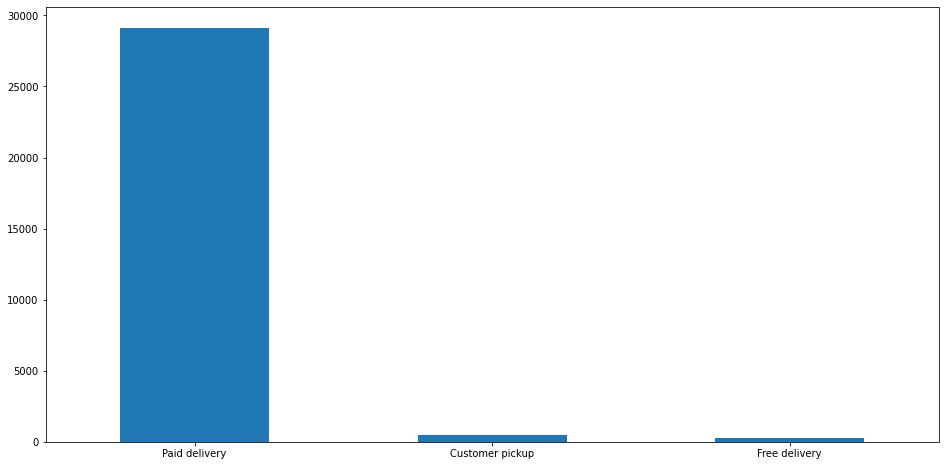

In [677]:
fig = plt.figure(figsize=(16,8))
df.Delivery.value_counts().plot.bar(rot = 0)

From the chart above we can tell that majority of the ads offer paid delivery

The last but no the least value is **Freezer**. Lets obtain what is going on there

In [678]:
df.Freezer.unique()

array([nan, 'Bottom', 'Top', 'Without Freezer', 'Left'], dtype=object)

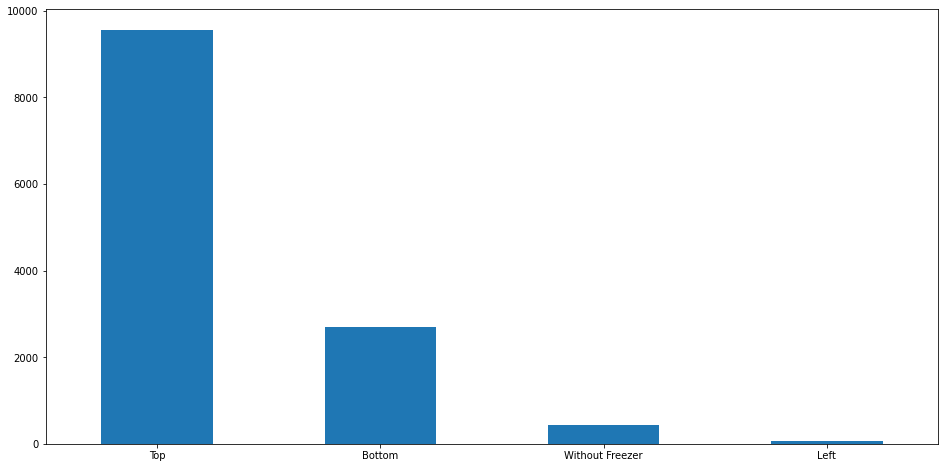

In [679]:
fig = plt.figure(figsize=(16,8))
df.Freezer.value_counts().plot.bar(rot = 0)

We will transform this column to the indicator that shows if the freezer is built in refrigerator. Because we guess thar location of freezer does not  really matter.


In [680]:
df.loc[df['Freezer'].isin(['Bottom', 'Top', 'Left']), 'Freezer'] = 1
df.loc[df['Freezer'] == 'Without Freezer', 'Freezer'] = 0

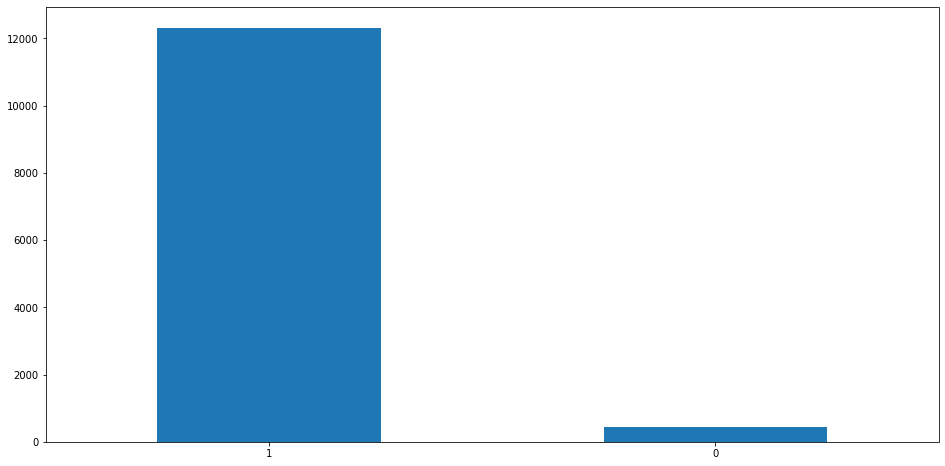

In [681]:
fig = plt.figure(figsize=(16,8))
df.Freezer.value_counts().plot.bar(rot = 0)

Refrigerator type distribution

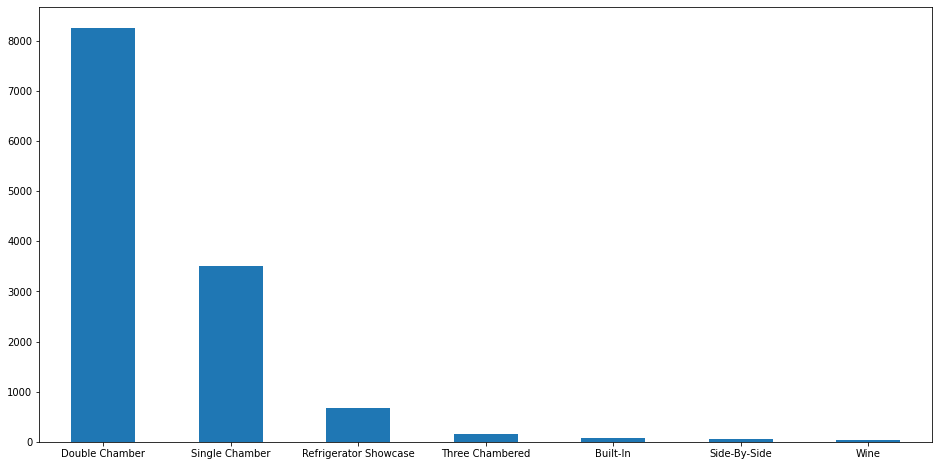

In [682]:
fig = plt.figure(figsize=(16,8))
df.Type.value_counts().plot.bar(rot = 0)

Now lets fix all the other missing values 
We will fill them with values obtained from the corresponding column distribution

In [683]:
df.Type.unique()

array([nan, 'Double Chamber', 'Three Chambered', 'Single Chamber',
       'Refrigerator Showcase', 'Built-In', 'Wine', 'Side-By-Side'],
      dtype=object)

In [684]:
s1 = df.Condition.value_counts(normalize=True)
s2 = df.standart_color.value_counts(normalize=True)
s3 = df.Type.value_counts(normalize=True)
s4 = df.Freezer.value_counts(normalize=True)
s5 = df.price_negotiable.value_counts(normalize=True)





In [685]:
missing = df['Condition'].isnull()
df.loc[missing,'Condition'] = np.random.choice(s1.index, size=len(df[missing]),p=s1.values)
missing = df['standart_color'].isnull()
df.loc[missing,'standart_color'] = np.random.choice(s2.index, size=len(df[missing]),p=s2.values)
missing = df['Type'].isnull()
df.loc[missing,'Type'] = np.random.choice(s3.index, size=len(df[missing]),p=s3.values)
missing = df['Freezer'].isnull()
df.loc[missing,'Freezer'] = np.random.choice(s4.index, size=len(df[missing]),p=s4.values)
missing = df['price_negotiable'].isnull()
df.loc[missing,'price_negotiable'] = np.random.choice(s5.index, size=len(df[missing]),p=s5.values)

Fixing the last non-numeric value:

In [686]:
df["price_negotiable"] = df["price_negotiable"].astype(int)


Checking for NaNs:

In [687]:
df.isna().values.sum()

3

Droping last Nans

In [688]:
df = df.dropna()

In [689]:
df = pd.get_dummies(df, columns=['Condition', 'Type', 'Freezer', 'Delivery'])

In [690]:
df.head()

,title_len,desc_len,completeness,price,price_negotiable,image_count,active_time,standart_color,Condition_For parts,Condition_Needs repair,Condition_New,Condition_Used,Type_Built-In,Type_Double Chamber,Type_Refrigerator Showcase,Type_Side-By-Side,Type_Single Chamber,Type_Three Chambered,Type_Wine,Freezer_0,Freezer_1,Delivery_Customer pickup,Delivery_Free delivery,Delivery_Paid delivery
1,36,293,59,234.0,0,1.0,1310.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,13,13,49,130.0,0,1.0,8.0,1.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
7,19,19,71,39.0,0,1.0,16.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
8,40,40,86,52.0,0,3.0,592.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
9,48,48,92,132.6,0,6.0,1037.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


**Scaling** data to (0,1):

In [691]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df.head()

,title_len,desc_len,completeness,price,price_negotiable,image_count,active_time,standart_color,Condition_For parts,Condition_Needs repair,Condition_New,Condition_Used,Type_Built-In,Type_Double Chamber,Type_Refrigerator Showcase,Type_Side-By-Side,Type_Single Chamber,Type_Three Chambered,Type_Wine,Freezer_0,Freezer_1,Delivery_Customer pickup,Delivery_Free delivery,Delivery_Paid delivery
1,0.493151,0.057541,0.414286,5.113239e-07,0.0,0.007576,0.069173,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.178082,0.002553,0.271429,2.840688e-07,0.0,0.007576,0.000422,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.260274,0.003731,0.585714,8.522065e-08,0.0,0.007576,0.000845,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.547945,0.007855,0.800000,1.136275e-07,0.0,0.022727,0.031260,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.657534,0.009427,0.885714,2.897502e-07,0.0,0.045455,0.054758,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


We have done the preprocessing of our data

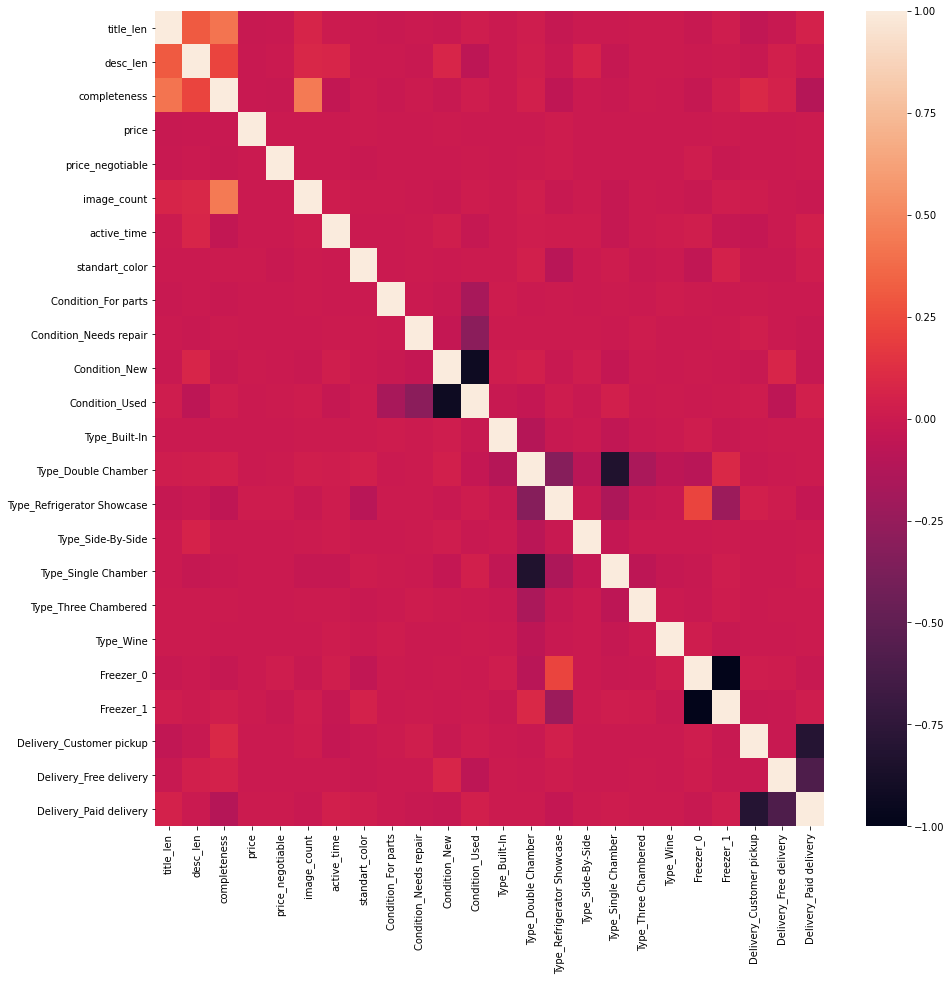

In [692]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

Remove correlated parameters to avoid multicolynearity

In [693]:
df = df.drop(['Delivery_Customer pickup', 'Delivery_Free delivery', 'Freezer_0', 'Type_Single Chamber', 'Condition_New'], axis =1)

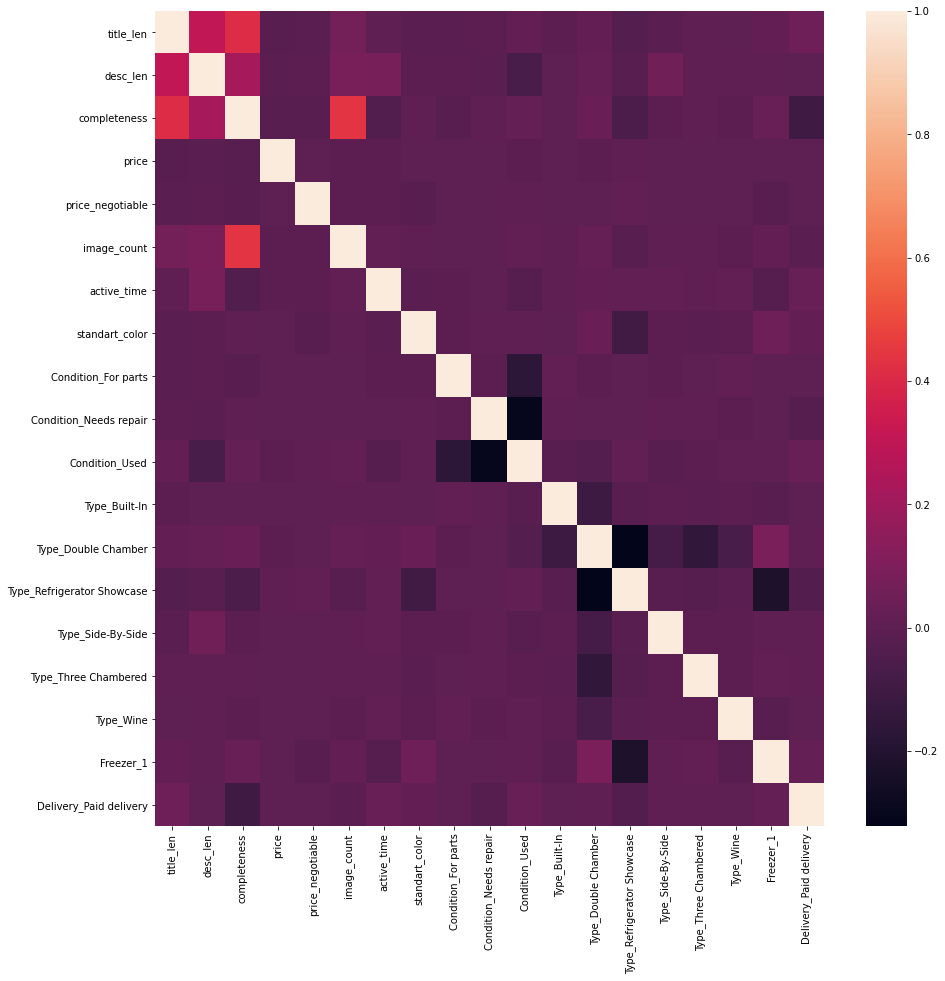

In [694]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

# Train-test split

Splitting data on 90% - train, 10% - test samples

In [695]:
X = df[['desc_len', 'completeness', 'image_count']]
# X = df.drop(['active_time','Delivery_Customer pickup', 'Delivery_Free delivery', 'Freezer_0', 'Type_Single Chamber', 'Condition_New'], axis =1)
y = df['active_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Regression methods

In [696]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            active_time   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     90.24
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           4.23e-58
Time:                        02:22:32   Log-Likelihood:                 37267.
No. Observations:               26921   AIC:                        -7.453e+04
Df Residuals:                   26917   BIC:                        -7.449e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0356      0.001     29.994      0.000       0.033       0.038
desc_len         0.2893      0.020     14.201      0.000       0.249       0.329
completeness    -0.0218      0.002    -10.929      0.000      -0.026      -0.018
image_count      0.1428      0.029      4.917      0.000       0.086       0.200
==============================================================================
Omnibus:                    27954.636   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2086546.769
Skew:                           5.199   Prob(JB):                         0.00
Kurtosis:                      44.857   Cond. No.                         93.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [698]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.012176091923815857

In [699]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test)

0.012176091923815857

As we can see this regression models are showing very poor results